Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('drive/MyDrive/Colab Notebooks/Tugas4Pekan3/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# df_copy = df
# df_copy



---



---



<h2>Soal 1: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk Global_Sales berdasarkan kategori Genre.

In [4]:
#code here
group_genre_global = df.groupby('Genre').agg({'Global_Sales':'mean'})
group_genre_global

,Global_Sales
Genre,
Action,0.528100
Adventure,0.185879
Fighting,0.529375
Misc,0.465762
Platform,0.938341
Puzzle,0.420876
Racing,0.586101
Role-Playing,0.623233
Shooter,0.791885


Expected Output:

![alt text](https://drive.google.com/uc?id=1o0jbuZ3Uq_ovT3CBeAz4-oCCzdzWTccj)



---



---



<h2>Soal 2: Perbandingan Kuantitatif Pieplot - Part a whole using Pie plot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

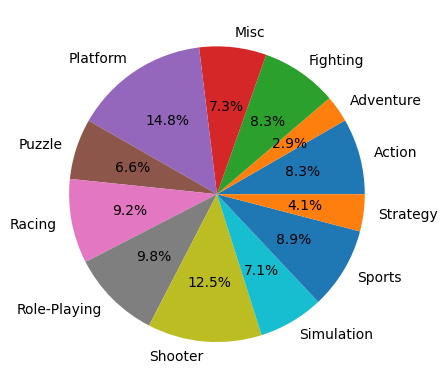

In [5]:
#code here
# group_genre_global.plot(kind='pie', y='Global_Sales', autopct='%1.1f%%')

fig, ax = plt.subplots()
ax.pie(group_genre_global['Global_Sales'], labels=group_genre_global.index, autopct='%1.1f%%')
plt.show()

Expected Output:

![alt text](https://drive.google.com/uc?id=14bMQ5LJjzAdYezU7g7Pdad12xEbOM5YE)



---



---



<h2>Soal 3: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [6]:
#code here
group_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
group_genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1PJ9fpUJd4RX_E3ST_yv6BHYf8uR-bGAs)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

In [7]:
group_salesT = group_genre_sales.transpose()
group_salesT

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.264726,0.082271,0.263667,0.235906,0.504571,0.212680,0.287766,0.219946,0.444733,0.211430,0.291283,0.100881
EU_Sales,0.158323,0.049868,0.119481,0.124198,0.227573,0.087251,0.190865,0.126384,0.239137,0.130773,0.160635,0.066579
JP_Sales,0.048236,0.040490,0.103007,0.061967,0.147596,0.098471,0.045388,0.236767,0.029221,0.073472,0.057702,0.072628
Other_Sales,0.056508,0.013072,0.043255,0.043312,0.058228,0.021564,0.061865,0.040060,0.078389,0.036355,0.057532,0.016681


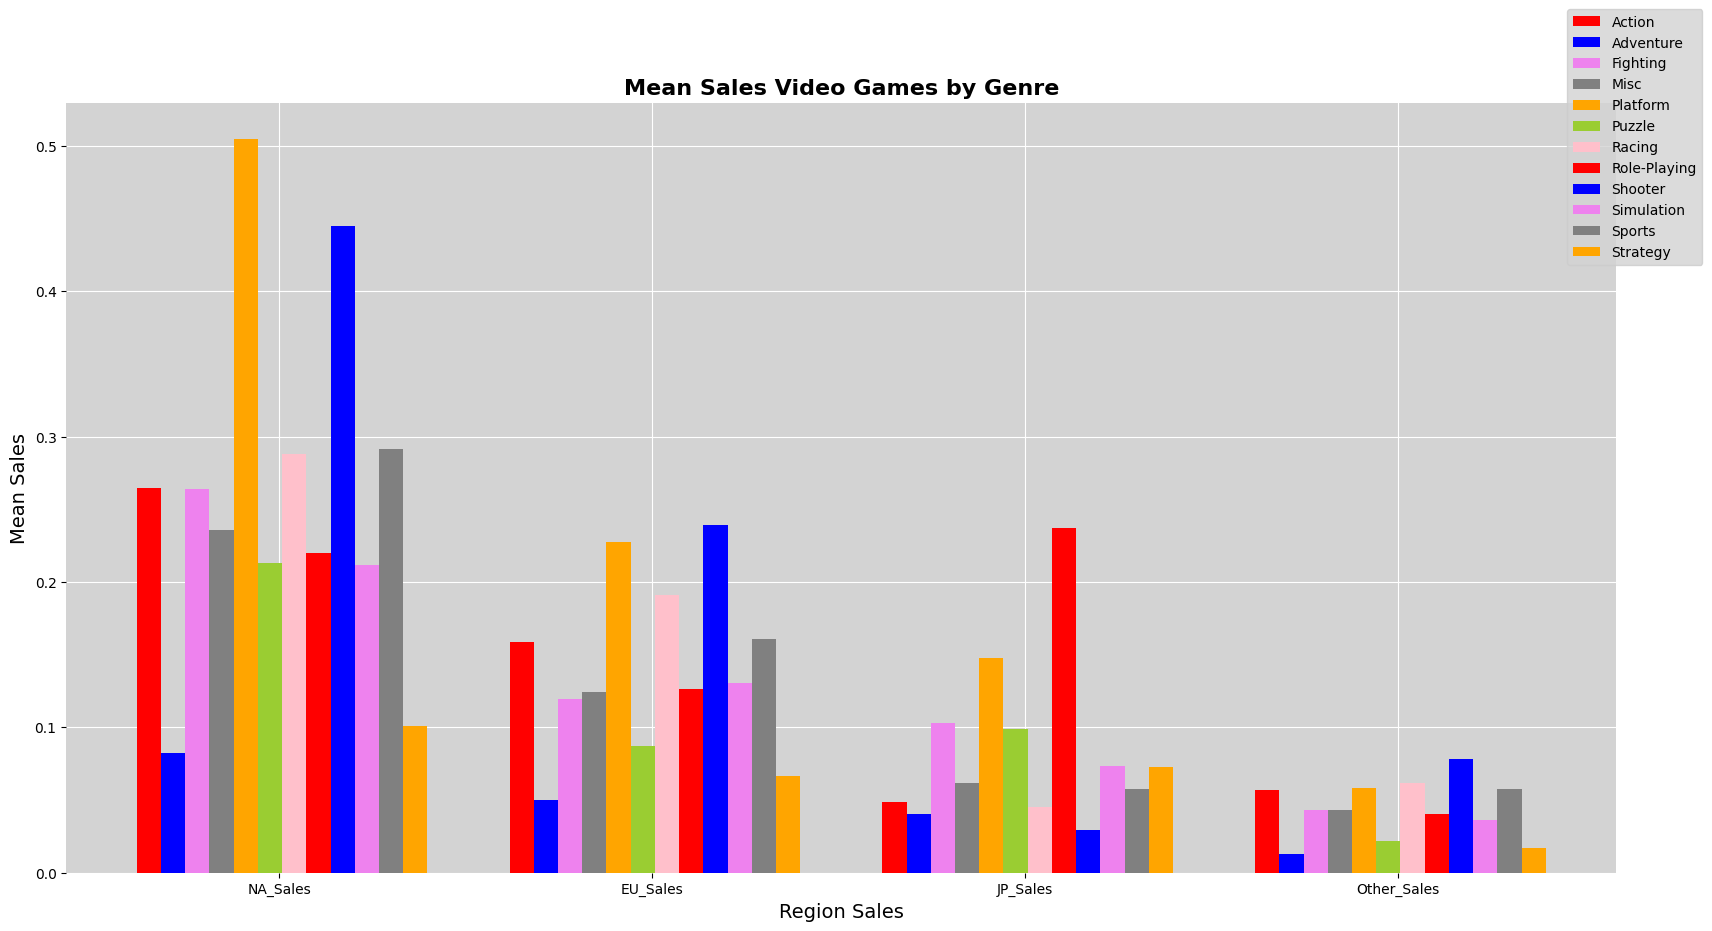

In [16]:
#code here
fig,ax = plt.subplots(figsize=(20,10))
x = np.arange(4)
width=0.065
colors=['red','blue','violet','grey','orange','yellowgreen','pink','red','blue','violet','grey','orange']

for i,j in enumerate(group_salesT.columns):
    ax.bar(x+(width*i), group_salesT[j], width=width, label=j, color=colors[i])

ax.set_title('Mean Sales Video Games by Genre', fontsize=16, fontweight="bold")
ax.set_xlabel('Region Sales', fontsize=14)
ax.set_ylabel('Mean Sales', fontsize=14)
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
ax.grid(color='white')
ax.legend(bbox_to_anchor=(1.06, 1.13), facecolor='lightgrey')

plt.xticks(x+0.35, labels=group_salesT.index)
plt.setp(ax.spines.values(), visible=False)

plt.show()

Berdasarkan data rata-rata penjualan yang diberikan untuk setiap genre di berbagai wilayah, terdapat beberapa wawasan yang dapat diambil:

1. **Platform Game Dominan di Semua Wilayah**: Genre platform memiliki rata-rata penjualan yang tinggi di semua wilayah (NA, EU, JP, dan Other). Hal ini menunjukkan popularitas yang konsisten dari game-platform di pasar global.

2. **Penjualan Terendah di Jepang untuk Shooter dan Strategy**: Genre shooter dan strategy memiliki rata-rata penjualan yang rendah di Jepang dibandingkan dengan wilayah lainnya. Ini bisa disebabkan oleh preferensi pasar yang berbeda di Jepang, di mana game-game tersebut mungkin kurang diminati oleh pemain lokal.

3. **Role-Playing Lebih Disukai di Jepang**: Genre role-playing (RPG) memiliki rata-rata penjualan yang tinggi di Jepang dibandingkan dengan wilayah lainnya. Ini mencerminkan popularitas yang besar dari permainan RPG di pasar Jepang, yang seringkali menarik pemain dengan cerita mendalam dan gameplay yang mendalam.

4. **Sports dan Racing Populer di Amerika Utara**: Genre sports dan racing memiliki rata-rata penjualan yang tinggi di Amerika Utara. Ini menunjukkan minat yang besar dari pemain di Amerika Utara dalam game-game olahraga dan balapan.

5. **Genre Misc dan Puzzle Tidak Terlalu Populer di Jepang**: Genre Misc (lain-lain) dan puzzle memiliki rata-rata penjualan yang relatif rendah di Jepang dibandingkan dengan wilayah lainnya. Ini menunjukkan bahwa preferensi pemain di Jepang mungkin lebih cenderung ke genre-genre lain seperti RPG dan platform.

6. **Distribusi Penjualan yang Berbeda di Setiap Wilayah**: Perhatikan bahwa ada variasi dalam distribusi penjualan game berdasarkan genre di setiap wilayah. Misalnya, penjualan game-platform lebih tinggi di Amerika Utara dan Eropa, sementara penjualan game RPG lebih tinggi di Jepang. Ini menunjukkan pentingnya memahami preferensi pasar lokal saat merencanakan pemasaran dan distribusi permainan.

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---